# Step 1 $\text{--}$ 1-D Linear Convection

The equation for the one dimensional linear convection (The 1D wave equation) is as follows:

$$
\frac{\partial u}{\partial t} = c \frac{\partial u}{\partial x}
$$

With given initial conditions (understood as a _wave_), the equation represents the propagation of that initial wave with speed $c$, without change of shape.
Let the initial condition be $u(x,\,0) = u_0(x)$.
Then the exact solution of the equation is $u(x,\,t)=u_0(x − ct)$.

We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the _Backward Difference_ scheme for the space derivative.
Consider discretizing the spatial coordinate $x$ into points that we index from $i = 0$ to $N$, and stepping in discrete time intervals of size $\Delta t$

From the definition of a derivative (and simply removing the limit), we know that:

$$
\frac{\partial u}{\partial x} = \frac{u(x+\Delta x) - u(x)}{\Delta x}
$$

Our discrete equation, then, is:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x}
$$

Where $n$ and $n+1$ are two consecutive steps in time, while $i−1$ and $i$ are two neighboring points of the discretized $x$ coordinate.
If there are given initial conditions, then the only unknown in this discretization is $u^{n+1}_i$.
We can solve for our unknown to get an equation that allows us to advance in time, as follows:

$$
u_i^{n+1} = u_i^n - c \frac{\mathop\Delta\!t}{\mathop\Delta\!x} (u_i^n - u_{i-1}^n)
$$

Now let's try implementing this in Python.

We'll start by importing a few libraries to help us out.

- `numpy` is a library that provides a bunch of useful matrix operations akin to MATLAB
- `matplotlib` is a 2D plotting library that we will use to plot our results
- `time` and `sys` provide basic timing functions that we'll use to slow down animations for viewing


In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.animation as anim
plt.rcParams['animation.html'] = 'html5'
plt.rcParams["figure.figsize"] = (4,3)

Now let's define a few variables; we want to define an evenly spaced grid of points within a spatial domain that is 2 units of length wide, i.e., $x_i \in (0,2)$.
We'll define a variable `nx`, which will be the number of grid points we want and `dx` will be the distance between any pair of adjacent grid points.

In [10]:
x_domain_interval: tuple[float] = (0, 2.0)
nx: int = 81  # try changing this number from 41 to 81 and Run All ... what happens?
dx: float = 2.0 / (nx - 1.0)
nt: int = 40  # nt is the number of timesteps we want to calculate
dt: float = 0.0125  # dt is the amount of time each timestep covers (delta t)
c: float = 1.0  # assume wavespeed of c = 1

# Spatial Doamin
x = np.linspace(*x_domain_interval, nx)

We also need to set up our __initial conditions__.
The initial velocity $u_0$ is given as $u = 2$ in the interval $0.5 \le x \le 1$ and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

Here, we use the function `ones()` defining a numpy array which is `nx` elements long with every value equal to `1.0`.

In [3]:
u = np.ones(nx)
# Setting u = 2 between 0.5 and 1 as per our I.C.s
u[int(0.5 / dx) : int(1.0 / dx + 1.0)] = 2.0
u0 = u.copy()
u0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now let's take a look at those initial conditions using a Matplotlib plot.

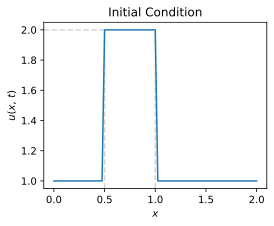

In [4]:
fig, ax = plt.subplots()

ax.axhline(y=2, xmax=0.28 / ax.get_xlim()[1], color="lightgray", linestyle="dashed")
ax.axvline(x=0.5, ymax=2.0 / ax.get_ylim()[1], color="lightgray", linestyle="dashed")
ax.axvline(x=1.0, ymax=2.0 / ax.get_ylim()[1], color="lightgray", linestyle="dashed")

(_,) = ax.plot(x, u0)

ax.set_title("Initial Condition")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$u(x,\,t)$")
plt.show()

Why doesn't the hat function have perfectly straight sides? Think for a bit.

Now it's time to implement the discretization of the convection equation using a finite-difference scheme.

For every element of our array $u$, we need to perform the operation $u_i^{n+1} = u^n_i − c\,({\mathop\Delta\! t}/{\mathop\Delta\! x}) (u^n_i − u^n_{i−1})$

In [5]:
u = np.ones(nx)
# setting u = 2 between 0.5 and 1 as per our I.C.s
u[int(0.5 / dx) : int(1.0 / dx + 1.0)] = 2.0

solutions = []
solutions.append(u0)

# Loop for values of n from 0 to nt, so it will run nt times
for n in range(nt):
    u[1:-1] = u[1:-1] - c * dt / dx * (u[1:-1] - u[:-2])
    solutions.append(u.copy())

Now let's try plotting our `u` array after advancing in time.

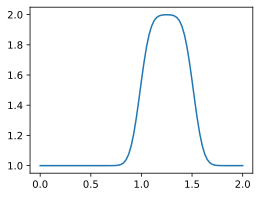

In [6]:
plt.plot(x, u)

Now, let's animate the solution from beginning all the way to the end time.
We can do that, using matplotlib, in two ways:
1. `pyplot.animation.FuncAnimation`
    - a function updates the data for a plot
2. `pyplot.animation.ArtistAnimation` 
    - takes a list of plots and displays them one after the another

Note that to be able to display animation in IPython Notebooks one must do the following:

```py
plt.rcParams['animation.html'] = 'html5'
```


In [9]:
fig, ax = plt.subplots()

# Empty plot ('animated_plot' object) to have sth that can be updated
lines = ax.plot(x, u0, "k-")
line = lines[0]
ax.set_ylim([0.95, 2.05])
plt.close()  # Don't draw anything


# Update function that updates the data on axes on every frame
def update_anim(frame):
    # Updates the prvious plot with current data
    line.set_ydata(solutions[frame])
    ax.set_title(f"Time: {float(frame)}")

    return (line,)


# Construction parameters:
# - fig: The figure we want to animate
# - func: a function that updates our data
#         (func(frame, *fargs) -> iterable_of_artists) and it returns updated plot(s)
# - frames: total number of frames
# - fargs: additional number of arguments
# - interval: delay between each frame in [ms]
# - blit (optional) -> bool: optimizing drawing
ani = anim.FuncAnimation(
    fig=fig, func=update_anim, frames=len(solutions), interval=35, blit=True
)
ani.save("btbs-anim-FuncAnimation.mp4")
ani

In [8]:
ims = []
fig, ax = plt.subplots()
plt.close()

for i, sol in enumerate(solutions):
    im = ax.plot(x, sol, "k-", animated=True)
    ax.set_ylim(0.95, 2.05)
    ims.append(im)

ani = anim.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani.save("btbs-anim-ArtistAnimation.gif")
ani